In [ ]:
from google.colab import files

uploaded = files.upload()

Saving SuperMarket Analysis.csv to SuperMarket Analysis.csv


In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv("SuperMarket Analysis.csv")

# Show basic info
df.shape

(1000, 17)

In [ ]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Sales,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,Alex,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,1:08:00 PM,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,Giza,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29:00 AM,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,Alex,Yangon,Normal,Female,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,1:23:00 PM,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,Alex,Yangon,Member,Female,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,8:33:00 PM,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,Alex,Yangon,Member,Female,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37:00 AM,Ewallet,604.17,4.761905,30.2085,5.3


In [ ]:
# Check column data types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Sales                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [ ]:
df.describe()

,Unit price,Quantity,Tax 5%,Sales,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


In [ ]:
df.isnull().sum()

,0
Invoice ID,0
Branch,0
City,0
Customer type,0
Gender,0
Product line,0
Unit price,0
Quantity,0
Tax 5%,0
Sales,0


# 1. Analyze the dataset and identify patterns that affect total sales.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

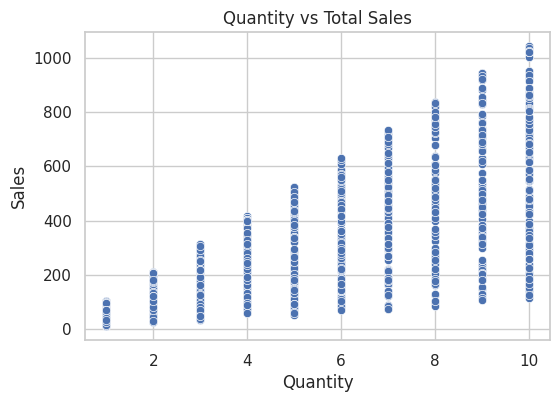

In [ ]:
#Quantity vs Total Sales

plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x="Quantity", y="Sales")
plt.title("Quantity vs Total Sales")
plt.show()

In [ ]:
df[["Quantity", "Sales"]].corr()

,Quantity,Sales
Quantity,1.00000,0.70551
Sales,0.70551,1.00000


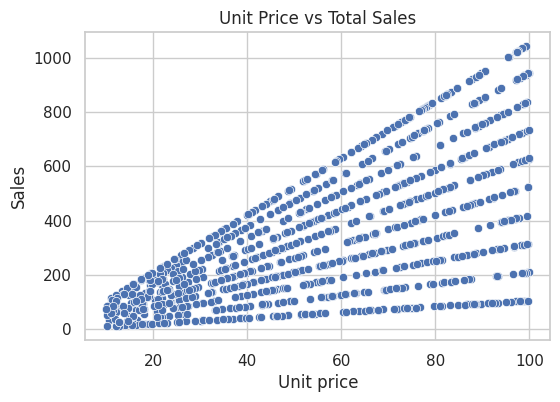

In [ ]:
#Unit Price vs Total Sales

plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x="Unit price", y="Sales")
plt.title("Unit Price vs Total Sales")
plt.show()

In [ ]:
df[["Unit price", "Sales"]].corr()

,Unit price,Sales
Unit price,1.000000,0.633962
Sales,0.633962,1.000000


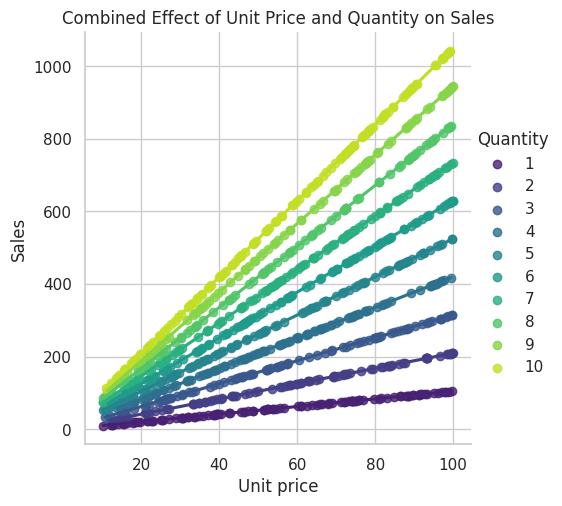

In [ ]:
sns.lmplot(
    data=df,
    x="Unit price",
    y="Sales",
    hue="Quantity",
    palette="viridis",
    height=5
)
plt.title("Combined Effect of Unit Price and Quantity on Sales")
plt.show()

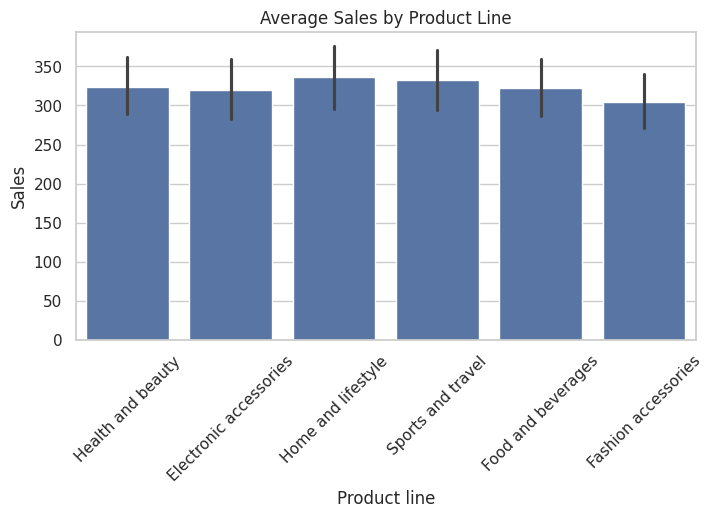

In [ ]:
import numpy as np

#Avg Sales by Product Line

plt.figure(figsize=(8,4))
sns.barplot(
    data=df,
    x="Product line",
    y="Sales",
    estimator=np.mean
)
plt.xticks(rotation=45)
plt.title("Average Sales by Product Line")
plt.show()

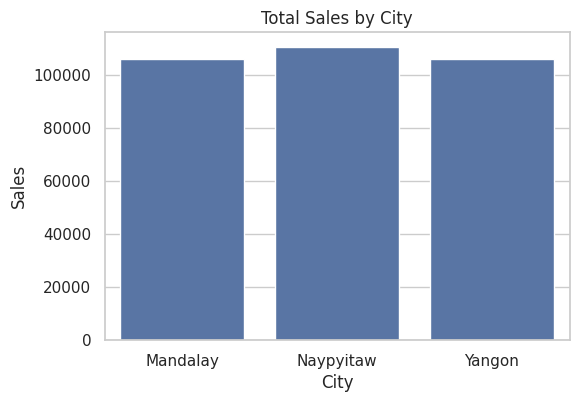

In [ ]:
#Total Sales by Cities

city_sales = df.groupby("City")["Sales"].sum().reset_index()

plt.figure(figsize=(6,4))
sns.barplot(data=city_sales, x="City", y="Sales")
plt.title("Total Sales by City")
plt.show()

In [ ]:
df["Date"] = pd.to_datetime(df["Date"])
df["Hour"] = pd.to_datetime(df["Time"]).dt.hour
df["Month"] = df["Date"].dt.month

/tmp/ipython-input-2156881208.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Hour"] = pd.to_datetime(df["Time"]).dt.hour


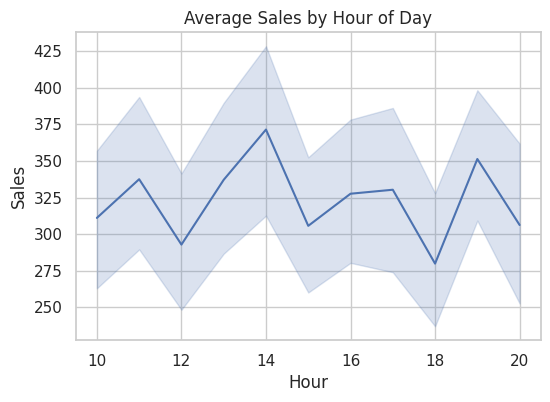

In [ ]:
#Avg Sales by Hour of Day

plt.figure(figsize=(6,4))
sns.lineplot(data=df, x="Hour", y="Sales", estimator=np.mean)
plt.title("Average Sales by Hour of Day")
plt.show()

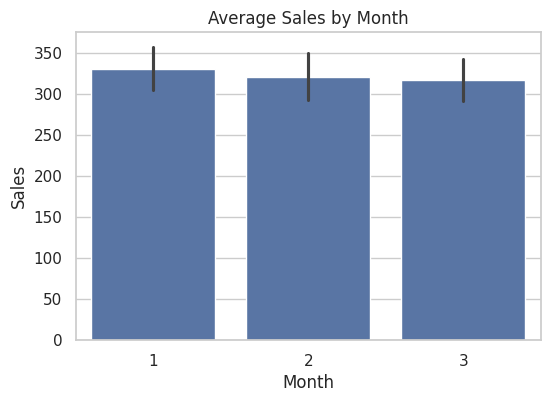

In [ ]:
#Avg Sales by Month

plt.figure(figsize=(6,4))
sns.barplot(data=df, x="Month", y="Sales", estimator=np.mean)
plt.title("Average Sales by Month")
plt.show()

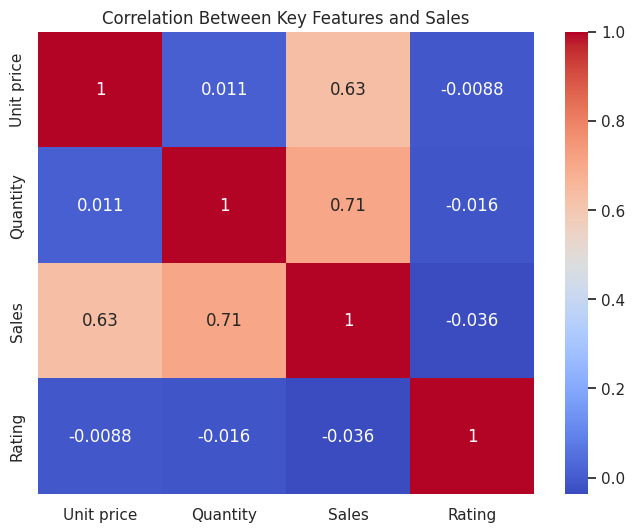

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(
    df[["Unit price", "Quantity", "Sales", "Rating"]].corr(),
    annot=True,
    cmap="coolwarm"
)
plt.title("Correlation Between Key Features and Sales")
plt.show()

Exploratory data analysis shows that total sales are primarily driven by quantity purchased and unit price. while time-based features especially Hours during the the day have a secondary effect as sales seem to peak around the 14:00 hour.
Customer rating shows a negative impact on sales.
Product line and city also a minimal influence on sales distribution.

# 2. Build machine learning models to predict total sales.

In [ ]:
# Columns that should NOT be used for prediction
leakage_and_ids = [
    "Invoice ID",
    "Tax 5%",
    "cogs",
    "gross income",
    "gross margin percentage"
]

df_model = df.drop(columns=leakage_and_ids)

In [ ]:
df_model.head()

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Sales,Date,Time,Payment,Rating
0,Alex,Yangon,Member,Female,Health and beauty,74.69,7,548.9715,1/5/2019,1:08:00 PM,Ewallet,9.1
1,Giza,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,80.2200,3/8/2019,10:29:00 AM,Cash,9.6
2,Alex,Yangon,Normal,Female,Home and lifestyle,46.33,7,340.5255,3/3/2019,1:23:00 PM,Credit card,7.4
3,Alex,Yangon,Member,Female,Health and beauty,58.22,8,489.0480,1/27/2019,8:33:00 PM,Ewallet,8.4
4,Alex,Yangon,Member,Female,Sports and travel,86.31,7,634.3785,2/8/2019,10:37:00 AM,Ewallet,5.3


In [ ]:
# Convert Date and Time to datetime
df_model["Date"] = pd.to_datetime(df_model["Date"])
df_model["Time"] = pd.to_datetime(df_model["Time"])

# Extract useful date features
df_model["Day"] = df_model["Date"].dt.day
df_model["Month"] = df_model["Date"].dt.month
df_model["Hour"] = df_model["Time"].dt.hour

# Drop original Date and Time columns
df_model = df_model.drop(columns=["Date", "Time"])

df_model.head()

/tmp/ipython-input-1472338784.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_model["Time"] = pd.to_datetime(df_model["Time"])


,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Sales,Payment,Rating,Day,Month,Hour
0,Alex,Yangon,Member,Female,Health and beauty,74.69,7,548.9715,Ewallet,9.1,5,1,13
1,Giza,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,80.2200,Cash,9.6,8,3,10
2,Alex,Yangon,Normal,Female,Home and lifestyle,46.33,7,340.5255,Credit card,7.4,3,3,13
3,Alex,Yangon,Member,Female,Health and beauty,58.22,8,489.0480,Ewallet,8.4,27,1,20
4,Alex,Yangon,Member,Female,Sports and travel,86.31,7,634.3785,Ewallet,5.3,8,2,10


In [ ]:
# Separate features and target
X = df_model.drop(columns=["Sales"])
y = df_model["Sales"]

In [ ]:
X.head()

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Payment,Rating,Day,Month,Hour
0,Alex,Yangon,Member,Female,Health and beauty,74.69,7,Ewallet,9.1,5,1,13
1,Giza,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,Cash,9.6,8,3,10
2,Alex,Yangon,Normal,Female,Home and lifestyle,46.33,7,Credit card,7.4,3,3,13
3,Alex,Yangon,Member,Female,Health and beauty,58.22,8,Ewallet,8.4,27,1,20
4,Alex,Yangon,Member,Female,Sports and travel,86.31,7,Ewallet,5.3,8,2,10


In [ ]:
y.head()

,Sales
0,548.9715
1,80.2200
2,340.5255
3,489.0480
4,634.3785


In [ ]:
from sklearn.preprocessing import OneHotEncoder

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include="object").columns
numerical_cols = X.select_dtypes(exclude="object").columns

In [ ]:
# One-Hot Encoder (drop first to avoid dummy variable trap)
encoder = OneHotEncoder(drop="first", sparse_output=False)

# Encode categorical features
X_encoded_cat = encoder.fit_transform(X[categorical_cols])

In [ ]:
# Convert encoded features to DataFrame
encoded_feature_names = encoder.get_feature_names_out(categorical_cols)
X_encoded_cat = pd.DataFrame(X_encoded_cat, columns=encoded_feature_names)

# Combine numerical and encoded categorical features
X_final = pd.concat(
    [X[numerical_cols].reset_index(drop=True), X_encoded_cat],
    axis=1
)

In [ ]:
X_final.head()

,Unit price,Quantity,Rating,Day,Month,Hour,Branch_Cairo,Branch_Giza,City_Naypyitaw,City_Yangon,Customer type_Normal,Gender_Male,Product line_Fashion accessories,Product line_Food and beverages,Product line_Health and beauty,Product line_Home and lifestyle,Product line_Sports and travel,Payment_Credit card,Payment_Ewallet
0,74.69,7,9.1,5,1,13,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,15.28,5,9.6,8,3,10,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,46.33,7,7.4,3,3,13,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,58.22,8,8.4,27,1,20,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,86.31,7,5.3,8,2,10,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [ ]:
X_final.shape

(1000, 19)

In [ ]:
X_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Unit price                        1000 non-null   float64
 1   Quantity                          1000 non-null   int64  
 2   Rating                            1000 non-null   float64
 3   Day                               1000 non-null   int32  
 4   Month                             1000 non-null   int32  
 5   Hour                              1000 non-null   int32  
 6   Branch_Cairo                      1000 non-null   float64
 7   Branch_Giza                       1000 non-null   float64
 8   City_Naypyitaw                    1000 non-null   float64
 9   City_Yangon                       1000 non-null   float64
 10  Customer type_Normal              1000 non-null   float64
 11  Gender_Male                       1000 non-null   float64
 12  Product

In [ ]:
X_final.describe()

,Unit price,Quantity,Rating,Day,Month,Hour,Branch_Cairo,Branch_Giza,City_Naypyitaw,City_Yangon,Customer type_Normal,Gender_Male,Product line_Fashion accessories,Product line_Food and beverages,Product line_Health and beauty,Product line_Home and lifestyle,Product line_Sports and travel,Payment_Credit card,Payment_Ewallet
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,55.672130,5.510000,6.97270,15.256000,1.993000,14.910000,0.332000,0.32800,0.32800,0.340000,0.435000,0.429000,0.178000,0.174000,0.152000,0.160000,0.166000,0.311000,0.345000
std,26.494628,2.923431,1.71858,8.693563,0.835254,3.186857,0.471167,0.46972,0.46972,0.473946,0.496005,0.495181,0.382704,0.379299,0.359201,0.366789,0.372267,0.463134,0.475606
min,10.080000,1.000000,4.00000,1.000000,1.000000,10.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32.875000,3.000000,5.50000,8.000000,1.000000,12.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,55.230000,5.000000,7.00000,15.000000,2.000000,15.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,77.935000,8.000000,8.50000,23.000000,3.000000,18.000000,1.000000,1.00000,1.00000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,99.960000,10.000000,10.00000,31.000000,3.000000,20.000000,1.000000,1.00000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
from sklearn.model_selection import train_test_split

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X_final,
    y,
    test_size=0.2,
    random_state=42
)

In [ ]:
X_train.shape, X_test.shape

((800, 19), (200, 19))

## **Train Linear Regression Model**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Initialize and train model
lr = LinearRegression()

In [ ]:
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Predictions
y_pred = lr.predict(X_test)

In [ ]:
y_pred

array([ 518.23962414,  589.5471337 ,  409.99574259,   95.41134907,
        -94.91977703,  594.66289517,  137.07949055,  658.87322001,
        483.79037809,  126.86803012,  509.31641951,  495.21895096,
        258.54917144,  325.65581017,  388.0693864 ,  403.06370786,
        570.74050165,  224.93683144,  682.38864726,  148.88079509,
        412.8053042 ,  245.65908582,  160.80862783,  126.57326079,
        345.61447435,  341.1667519 ,  664.37491451, -119.61378932,
        136.90306168,   39.93677306,  145.75978359,  556.04985759,
        260.4725811 ,  431.67481533,  222.07943686,  153.97189299,
        629.971337  ,  203.43079779,  180.73211572,  198.98252657,
        204.43399601,  760.08966448,   75.12786964,  294.47275742,
        257.89736128,  478.927977  ,  231.42078228,  140.0040756 ,
        402.23801973,  289.87225163,  449.00223577,  198.34984701,
         21.09676446,  280.35380116,  156.77731075,  521.82340346,
        478.70802836,   -5.55587428,  446.79629485,  205.29949

In [ ]:
y_pred.shape

(200,)

In [ ]:
y_test

,Sales
521,523.9710
737,616.9800
740,408.7335
660,135.3555
411,45.9270
...,...
408,237.4260
332,404.3550
208,95.6655
613,84.9765


In [ ]:
y_pred[0:5], y_test[0:5]

(array([518.23962414, 589.5471337 , 409.99574259,  95.41134907,
        -94.91977703]),
 521    523.9710
 737    616.9800
 740    408.7335
 660    135.3555
 411     45.9270
 Name: Sales, dtype: float64)

In [ ]:
# Evaluation metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

r2 = r2_score(y_test, y_pred)

In [ ]:
rmse

np.float64(79.94108201300577)

In [ ]:
r2

0.9017726068536073

#**Train Random Forest Regressor**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Initialize Random Forest
rf = RandomForestRegressor(
    n_estimators=100,
    random_state=42
)

In [ ]:
# Train
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
# Predict
y_pred_rf = rf.predict(X_test)

In [ ]:
y_pred_rf[0:5]

array([530.03727 , 571.52172 , 406.589295, 139.36104 ,  47.765025])

In [ ]:
y_test[0:5]

,Sales
521,523.9710
737,616.9800
740,408.7335
660,135.3555
411,45.9270


In [ ]:
# Evaluate
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

In [ ]:
rmse_rf, r2_rf

(np.float64(10.52876461401552), 0.9982960870364496)

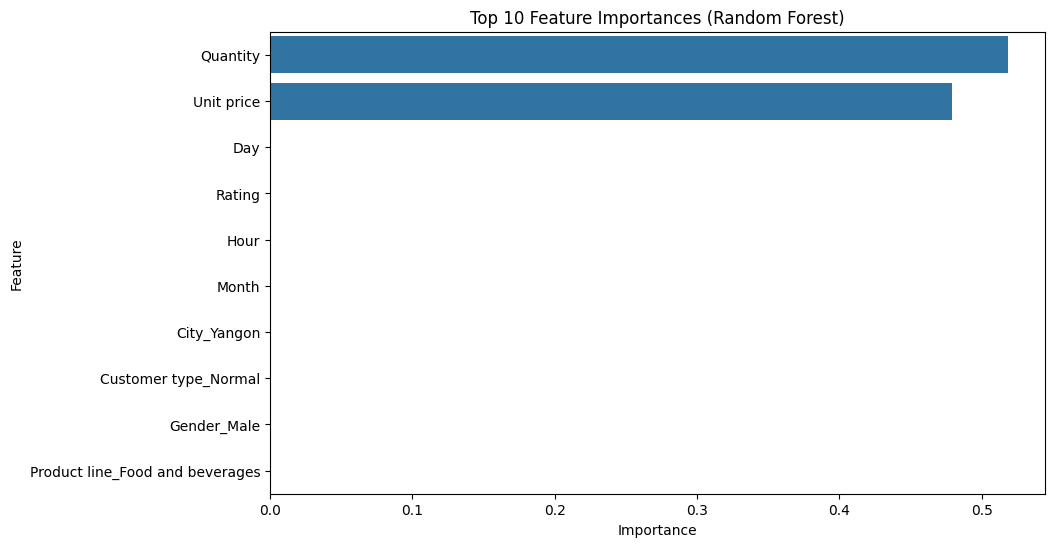

,Feature,Importance
1,Quantity,0.518440
0,Unit price,0.478993
3,Day,0.000532
2,Rating,0.000517
5,Hour,0.000341
4,Month,0.000191
9,City_Yangon,0.000108
10,Customer type_Normal,0.000093
11,Gender_Male,0.000090
13,Product line_Food and beverages,0.000089


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importances
importances = rf.feature_importances_
feature_names = X_final.columns

# Create DataFrame
feat_imp_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

# Plot top 10 features
plt.figure(figsize=(10,6))
sns.barplot(x="Importance", y="Feature", data=feat_imp_df.head(10))
plt.title("Top 10 Feature Importances (Random Forest)")
plt.show()

feat_imp_df.head(10)

## **Train Gradient Boosting Regressor (SGBoost)**

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
# Initialize Gradient Boosting Regressor
gbr = GradientBoostingRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)

In [ ]:
# Train
gbr.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [ ]:
# Predict
y_pred_gbr = gbr.predict(X_test)

In [ ]:
y_pred_gbr[0:5], y_test[0:5]

(array([527.69999654, 579.53155782, 407.2502805 , 132.00808182,
         42.41998872]),
 521    523.9710
 737    616.9800
 740    408.7335
 660    135.3555
 411     45.9270
 Name: Sales, dtype: float64)

In [ ]:
# Evaluate
rmse_gbr = np.sqrt(mean_squared_error(y_test, y_pred_gbr))
r2_gbr = r2_score(y_test, y_pred_gbr)

In [ ]:
rmse_gbr, r2_gbr

(np.float64(10.634282508469601), 0.9982617631157775)

#3. Evaluate model performance and select the best-performing model.

In [ ]:
import pandas as pd

# Create a comparison table
model_comparison = pd.DataFrame({
    "Model": ["Linear Regression", "Random Forest Regressor", "Gradient Boosting Regressor"],
    "RMSE": [79.941, 10.529, 10.634],
    "R²": [0.902, 0.9983, 0.9983]
})

# Sort by RMSE (lower is better)
model_comparison = model_comparison.sort_values(by="RMSE")

# Highlight the best model
best_model = model_comparison.iloc[0]["Model"]

print(f"✅ Best Model: {best_model} (Lowest RMSE)")
model_comparison

✅ Best Model: Random Forest Regressor (Lowest RMSE)


,Model,RMSE,R²
1,Random Forest Regressor,10.529,0.9983
2,Gradient Boosting Regressor,10.634,0.9983
0,Linear Regression,79.941,0.9020


In [ ]:
# ✅ Deployment-ready Random Forest prediction pipeline
import pandas as pd
import numpy as np

# Define categorical options
branch_options = ["Alex", "Cairo", "Giza"]
city_options = ["Yangon", "Naypyitaw"]
customer_type_options = ["Member", "Normal"]
gender_options = ["Female", "Male"]
product_line_options = [
    "Health and beauty", "Electronic accessories", "Home and lifestyle",
    "Sports and travel", "Food and beverages", "Fashion accessories"
]
payment_options = ["Cash", "Credit card", "Ewallet"]

# Function to get valid input from user
def get_input(prompt, options=None, numeric=False):
    while True:
        value = input(prompt)
        if numeric:
            try:
                return float(value)
            except ValueError:
                print("❌ Please enter a numeric value.")
        else:
            if value in options:
                return value
            else:
                print(f"❌ Invalid option. Please choose from: {', '.join(options)}")

# Prompt user for numerical inputs
unit_price = get_input("Enter Unit price: ", numeric=True)
quantity = get_input("Enter Quantity: ", numeric=True)
rating = get_input("Enter Rating: ", numeric=True)
day = get_input("Enter Day (1-31): ", numeric=True)
month = get_input("Enter Month (1-12): ", numeric=True)
hour = get_input("Enter Hour (0-23): ", numeric=True)

# Prompt user for categorical inputs
branch = get_input(f"Branch options: {', '.join(branch_options)}\nEnter Branch: ", options=branch_options)
city = get_input(f"City options: {', '.join(city_options)}\nEnter City: ", options=city_options)
customer_type = get_input(f"Customer type options: {', '.join(customer_type_options)}\nEnter Customer type: ", options=customer_type_options)
gender = get_input(f"Gender options: {', '.join(gender_options)}\nEnter Gender: ", options=gender_options)
product_line = get_input(f"Product line options: {', '.join(product_line_options)}\nEnter Product line: ", options=product_line_options)
payment = get_input(f"Payment options: {', '.join(payment_options)}\nEnter Payment: ", options=payment_options)

# Create a DataFrame with user input
user_input = pd.DataFrame({
    "Unit price": [unit_price],
    "Quantity": [quantity],
    "Rating": [rating],
    "Day": [day],
    "Month": [month],
    "Hour": [hour],
    "Branch": [branch],
    "City": [city],
    "Customer type": [customer_type],
    "Gender": [gender],
    "Product line": [product_line],
    "Payment": [payment]
})

# One-Hot Encode categorical columns using training encoder
categorical_cols = ["Branch", "City", "Customer type", "Gender", "Product line", "Payment"]
X_encoded_cat = encoder.transform(user_input[categorical_cols])
encoded_feature_names = encoder.get_feature_names_out(categorical_cols)
X_encoded_cat = pd.DataFrame(X_encoded_cat, columns=encoded_feature_names)

# Combine numerical and encoded categorical features
numerical_cols = ["Unit price", "Quantity", "Rating", "Day", "Month", "Hour"]
X_final_user = pd.concat([user_input[numerical_cols].reset_index(drop=True), X_encoded_cat], axis=1)

# Align user input features with training features (in case some columns were dropped)
missing_cols = set(X_final.columns) - set(X_final_user.columns)
for col in missing_cols:
    X_final_user[col] = 0
X_final_user = X_final_user[X_final.columns]

# Make prediction using Random Forest Regressor
predicted_sales = rf.predict(X_final_user)[0]

# Output result
print("\n✅ You are using the Random Forest Regressor (best model).")
print(f"Predicted Sales for this transaction: ₦{predicted_sales:.2f}")

Enter Unit price: 3
Enter Quantity: 5
Enter Rating: 0.5
Enter Day (1-31): 6
Enter Month (1-12): 5
Enter Hour (0-23): 21
Branch options: Alex, Cairo, Giza
Enter Branch: 2
❌ Invalid option. Please choose from: Alex, Cairo, Giza
Branch options: Alex, Cairo, Giza
Enter Branch: Cairo
City options: Yangon, Naypyitaw
Enter City: Yangon
Customer type options: Member, Normal
Enter Customer type: Mormal
❌ Invalid option. Please choose from: Member, Normal
Customer type options: Member, Normal
Enter Customer type: Normal
Gender options: Female, Male
Enter Gender: Male
Product line options: Health and beauty, Electronic accessories, Home and lifestyle, Sports and travel, Food and beverages, Fashion accessories
Enter Product line: Sports and travel
Payment options: Cash, Credit card, Ewallet
Enter Payment: Cash

✅ You are using the Random Forest Regressor (best model).
Predicted Sales for this transaction: ₦64.12


4. Provide actionable insights that could support business decision-making.


Actionable insights

Quantity (51.8%) and Unit price (47.9%) dominate sales

Sales are mostly determined by how many items customers buy and their unit prices.

Other factors (day, hour, city, customer type) have negligible impact in this dataset.

No strong temporal pattern in sales.


This suggests sales are fairly consistent across days and hours, or dataset is too small to detect patterns.

Demographics and product lines have very little effect
Customer type, gender, and specific product lines contribute very little individually to total sales.
Implication: pricing and quantity matter more than demographics in driving sales.



2️⃣ Actionable Business Insights

A. Inventory & Stock Planning
Focus on high-selling products by quantity rather than demographic segments.
Ensure enough stock for high-unit-price items, since they strongly influence sales revenue.

B. Pricing Strategy
Adjust unit prices strategically:
Small changes in unit price have a large effect on total sales revenue.
Consider promotions or bundling for high-unit-price items to maximize revenue.

C. Staff & Operational Planning
Since temporal features (day, hour, month) have very low importance, staffing doesn’t need extreme fluctuations by day or time.
Focus on handling larger quantities and high-value transactions efficiently.

D. Customer Engagement
Since customer type and gender have minimal effect:
Marketing can focus less on demographic segmentation for sales increases.
Promotions based on volume or product pricing are more effective than targeting “Member” vs “Normal” customers.

E. Product Line Strategy
While specific product lines individually have small impact, bundling products or highlighting high-value combinations could increase quantity sold, which is the most important factor.


3️⃣ Summary of Strategic Focus
Primary drivers of sales: Quantity & Unit price
Secondary drivers: Minimal effect from demographics or temporal patterns
Recommendation: Focus on pricing, bundle strategies, and inventory for high-quantity/high-price items rather than complex customer segmentation or time-based campaigns.